# Home Location Inference

In [1]:
from cider.datastore import DataStore
from cider.home_location import HomeLocator

Load some CDR data, antennas data, and (optionally) spatial files, whose paths have been defined in `config.yml`. Define the geographic granularity for inference (options are ‘antenna_id’, ‘tower_id’ if a tower_id is provided in the antennas files, or any of the spatial files). Optionally load wealth prediction data to construct a poverty map and ground truth location data to evaluate accuracy.

In [3]:
# This path should point to your cider installation, where configs and data for this demo are located.
from pathlib import Path
cider_installation_directory = Path('../../cider')

datastore = DataStore(config_file_path_string= cider_installation_directory / 'configs' / 'config_quickstart.yml')
home_locator = HomeLocator(datastore=datastore, clean_folders=True)

Loading CDR...
Loading antennas...


Filter to a specific date range.

In [4]:
home_locator.ds.filter_dates('2020-01-05', '2020-02-01')

Try running the three different home location algorithms, specifying towers as the requested geographic level of aggregation.

```{note}
The three algorithms currently implemented are relatively simple; more sophisticate methods to infer users' home locations do exist.
```

In [5]:
home_locator.get_home_locations(algo='count_transactions', geo='tower_id')
home_locator.get_home_locations(algo='count_days', geo='tower_id')
home_locator.get_home_locations(algo='count_modal_days', geo='tower_id')

subscriber_id tower_id  count_modal_days
0      JGPCbfDGes      t35                 4
1      YtvkGlMWwe      t39                 4
2      dYwshzRseD      t26                 4
3      dsBHAdXrrk      t35                 2
4      ygMEXUQDbn      t27                 4
..            ...      ...               ...
995    amzyXHglBx       t7                 3
996    dJSvXqUVSY      t64                 3
997    ptudOnjdRU      t35                 5
998    uXZrufHOmE      t79                 4
999    zZkqaZFAtz      t80                 4

[1000 rows x 3 columns]

Generate a population map based on inferred home locations using the unique days algorithm. Use points at each of the tower locations.

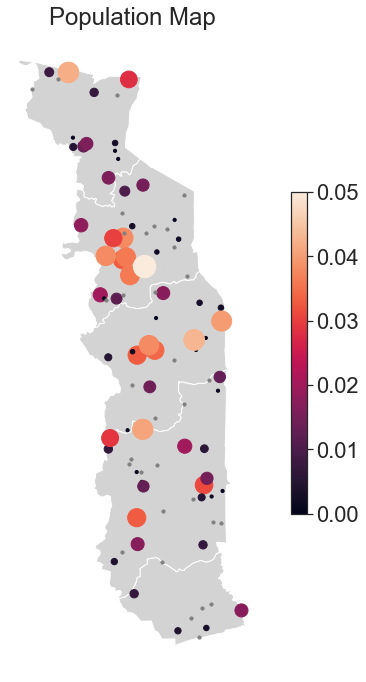

In [6]:
home_locator.map(algo='count_days', geo='tower_id', kind='population', voronoi=False)

Evaluate the accuracy of the home location inference using the ground truth data. Generate maps and a table of precision and recall for each tower.

Observations with inferred home location: 1000 (1000 unique)
Observations with ground truth home location: 1000 (1000 unique)
Observations with both: 1000 (1000 unique)
Overall accuracy: 0.02


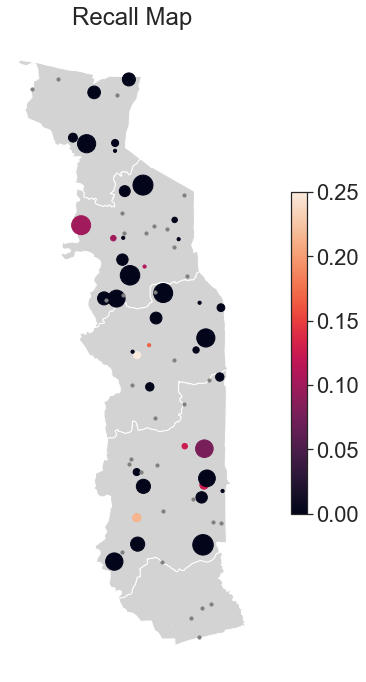

In [7]:
home_locator.accuracy(algo='count_days', geo='tower_id')
home_locator.map(algo = 'count_days', geo='tower_id', kind='recall', voronoi=False)

In [8]:
home_locator.accuracy_tables[('tower_id', 'count_days')].head()

tower_id    recall  precision  overall_accuracy
67       t7  0.076923   0.166667             0.017
15      t22  0.250000   0.142857             0.017
33      t39  0.214286   0.090909             0.017
66      t69  0.100000   0.055556             0.017
37      t42  0.153846   0.055556             0.017

Use population density maps to identify which areas are over/under-represented in your sample.

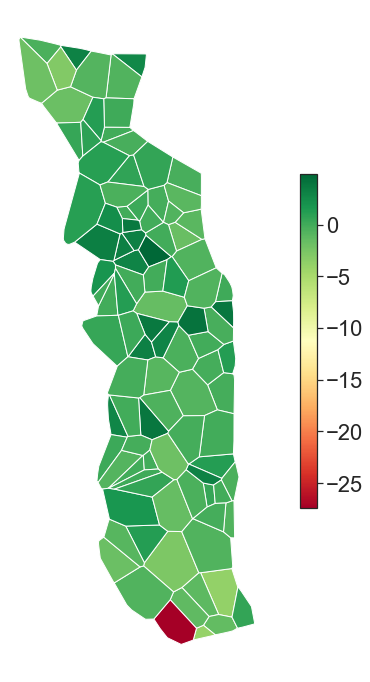

In [9]:
home_locator.pop_comparison(algo='count_days', geo='tower_id')